In [1]:
# TEST SCIPY FUNCTIONALITIES

# http://stackoverflow.com/questions/1819124/image-comparison-algorithm
import scipy as sp
from scipy.misc import imread
from scipy.signal.signaltools import correlate2d as c2d

def get(i):
    # get JPG image as Scipy array, RGB (3 layer)
    data = imread('Lab3.1/%s.jpg' % i)
    # convert to grey-scale using W3C luminance calc
    data = sp.inner(data, [299, 587, 114]) / 1000.0
    print ('image %s loaded' % i)
    # normalize per http://en.wikipedia.org/wiki/Cross-correlation
    return (data - data.mean()) / data.std()

#im1 = get('01')
#im2 = get('02')
#im3 = get('03')
# ...
im12 = get('12')

#im1.shape
#im2.shape
#im3.shape
#...
print (im12.shape)

#c11 = c2d(im1, im1, mode='same')
#c12 = c2d(im1, im2, mode='same')
#c13 = c2d(im1, im3, mode='same')
#c23 = c2d(im2, im3, mode='same')
#c1212 = c2d(im12, im12, mode='same')
#c11.max(), c12.max(), c13.max(), c23.max()

#print (c1212.max())
print ('done')

image 12 loaded
(764, 660)
done


In [2]:
# CHECK OPENCV FUNCTIONALITY
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t

print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 2.4.8 


In [2]:
# TEST OPENCV FUNCITONS

# http://www.pyimagesearch.com/2014/03/03/charizard-explains-describe-quantify-image-using-feature-vectors/
# http://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/

import cv2
import numpy as np
from matplotlib import pyplot as plt
#import argparse

def readImg(n):
    print ('reading image {}'.format(n))
    return cv2.imread('Lab3.1/%s.jpg' % n)

def showImg(i):
    cv2.imshow("image {}".format(i), i)

def getShape(i):
    return i.shape

def getRawPixelFeatureVectors(i):
    return i.flatten()

# B G R (reverse order of RGB)
def getMean(i):
    return cv2.mean(i)[:3]

def getMeanStdDev(i):
    return cv2.meanStdDev(i)

def getMeanStdDevFV(i):
    return np.concatenate([cv2.meanStdDev(i)]).flatten()

def getHist(i):
    #cv2.calcHist(images, channels, mask, histSize, ranges)
    return cv2.calcHist([i], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

def getHistShape(i):
    return getHist(i).shape

def getHistFlattenedShape(i):
    return getHist(i).flatten().shape

def getGrayscale(i):
    return cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)

def getGrayscaleHist(i):
    return cv2.calcHist([getGrayscale(i)], [0], None, [256], [0, 256])

def plotGrayscaleHist(i):
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(getGrayscaleHist(i))
    plt.xlim([0, 256])
    plt.show()
    
def plotFlattenedColorHist(i):
    chans = cv2.split(i)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("'Flattened' Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    features = []

    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the current channel and
        # concatenate the resulting histograms for each
        # channel
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        features.extend(hist)

        # plot the histogram
        plt.plot(hist, color = color)
        plt.xlim([0, 256])
    plt.show()
    print "flattened feature vector size: %d" % (np.array(features).flatten().shape)
    
def plot2dColorHist(i):
    chans = cv2.split(i)
    fig = plt.figure()
 
    # plot a 2D color histogram for green and blue
    ax = fig.add_subplot(131)
    hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
        [32, 32], [0, 256, 0, 256])
    p = ax.imshow(hist, interpolation = "nearest")
    ax.set_title("2D Color Histogram for Green and Blue")
    plt.colorbar(p)

    # plot a 2D color histogram for green and red
    ax = fig.add_subplot(132)
    hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
        [32, 32], [0, 256, 0, 256])
    p = ax.imshow(hist, interpolation = "nearest")
    ax.set_title("2D Color Histogram for Green and Red")
    plt.colorbar(p)

    # plot a 2D color histogram for blue and red
    ax = fig.add_subplot(133)
    hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
        [32, 32], [0, 256, 0, 256])
    p = ax.imshow(hist, interpolation = "nearest")
    ax.set_title("2D Color Histogram for Blue and Red")
    plt.colorbar(p)

    # finally, let's examine the dimensionality of one of
    # the 2D histograms
    print "2D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0])
    plt.show()
    
def get3dColorHist(i):
    hist = cv2.calcHist([i], [0, 1, 2],
        None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    print "3D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0])


image11 = readImg('11')
image12 = readImg('12')

## DISPLAY IMAGES
#showImg(image12)
#showImg(getGrayscale(image12))

print ("image12 shape: {}".format(getShape(image12)))
print ("image12 raw: {}".format(getRawPixelFeatureVectors(image12)))
print ("image12 mean: {}".format(getMean(image12)))
print ("image12 mean and std dev: {}".format(getMeanStdDev(image12)))
print ("image12 mean and std dev feature vector: {}".format(getMeanStdDevFV(image12)))
#print ("image12 hist: {}".format(getHist(image12)))
print ("image12 hist shape: {}".format(getHistShape(image12)))
print ("image12 hist flattened shape: {}".format(getHistFlattenedShape(image12)))
#print ("image12 greyscale hist: {}".format(getGrayscaleHist(image12)))

## GREYSCALE HISTOGRAM
#plotGrayscaleHist(image11)

## FLATTENED COLOR HISTOGRAM
#plotFlattenedColorHist(image12)

## MULTI-DIMENSTIONAL HISTOGRAM
#plot2dColorHist(image12)

## GET 3D COLOR HISTOGRAM
#get3dColorHist(image12)
#get3dColorHist(image11)

hist11 = getHist(image11)
hist12 = getHist(image12)
#print ('hist11: {}'.format(hist11))
#print ('hist12: {}'.format(hist12))

normHist11 = cv2.normalize(hist11)
flaHist11 = normHist11.flatten()

normHist12 = cv2.normalize(hist12)
flaHist12 = normHist12.flatten()

d1112 = cv2.compareHist(flaHist11, flaHist12, cv2.cv.CV_COMP_CHISQR)
d1211 = cv2.compareHist(flaHist12, flaHist11, cv2.cv.CV_COMP_CHISQR)
print ('d1112: {}'.format(d1112))
print ('d1211: {}'.format(d1211))



reading image 11
reading image 12
image12 shape: (764, 660, 3)
image12 raw: [40 53 55 ..., 44 51 54]
image12 mean: (35.103532048231, 65.31478264318578, 75.52246945898779)
image12 mean and std dev: (array([[ 35.10353205],
       [ 65.31478264],
       [ 75.52246946]]), array([[ 14.61471932],
       [ 35.15349346],
       [ 47.17270355]]))
image12 mean and std dev feature vector: [ 35.10353205  65.31478264  75.52246946  14.61471932  35.15349346
  47.17270355]
image12 hist shape: (8, 8, 8)
image12 hist flattened shape: (512,)
flattened feature vector size: 768
d1112: 29.8181322664
d1211: 396.106331002


In [12]:
# IMAGE COMPARISON

# http://www.pyimagesearch.com/2014/01/27/hobbits-and-histograms-a-how-to-guide-to-building-your-first-image-search-engine-in-python/


# import the necessary packages
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
 
class RGBHistogram:
    def __init__(self, bins):
        # store the number of bins the histogram will use
        self.bins = bins
 
    def describe(self, image):
        # compute a 3D histogram in the RGB colorspace,
        # then normalize the histogram so that images
        # with the same content, but either scaled larger
        # or smaller will have (roughly) the same histogram
        
        # cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
        hist = cv2.calcHist([image], [0, 1, 2], None, self.bins, [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist)
        #print ('hist: {}'.format(hist))
        #print ('flattened hist: {}'.format(hist.flatten()))
        # return out 3D histogram as a flattened array
        return hist.flatten()

    def describeGreyScale(self, image):
        imageGrey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hist = cv2.calcHist([imageGrey], [0], None, self.bins, [0, 256])
        hist = cv2.normalize(hist)
        return hist.flatten()
    
class HSVHistogram:
    def __init__(self, bins):
        # store the number of bins the histogram will use
        self.bins = bins
    def convert(self, image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
    def describe(self, image):        
        # cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
        #print ('image before conversion: {}'.format(image))
        hsv = self.convert(image)
        #print ('image after conversion: {}'.format(image))
        #hist = cv2.calcHist([image], [0, 1, 2], None, self.bins, [0, 256, 0, 256, 0, 256])
        #hist = cv2.normalize(hist)
        
        #hue and satuation
        #hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
        
        #hue, satuation and value (brightness)
        hist = cv2.calcHist([hsv], [0, 1, 2], None, [180, 256, 100], [0, 180, 0, 256, 0, 100])
        
        #plt.imshow(hist,interpolation = 'nearest')
        #plt.show()
        #print ('hist: {}'.format(hist))
        #print ('flattened hist: {}'.format(hist.flatten()))
        # return out 3D histogram as a flattened array
        return hist.flatten()
    
    def describeHue(self, image):
        hsv = self.convert(image)
        hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])
        return hist.flatten()
    def describeSaturation(self, image):
        hsv = self.convert(image)
        hist = cv2.calcHist([hsv], [1], None, [256], [0, 256])
        return hist.flatten()
    def describeBrightness(self, image):
        hsv = self.convert(image)
        hist = cv2.calcHist([hsv], [2], None, [100], [0, 100])
        return hist.flatten()


class Comparator:
    def __init__(self, index):
        # store our index of images
        self.index = index
    def compare(self, queryFeatures):
        # initialize our dictionary of results
        results = {}
        
        # loop over the index
        for (k, features) in self.index.items():
            # compute the chi-squared distance between the features
            # in our index and our query features -- using the
            # chi-squared distance which is normally used in the
            # computer vision field to compare histograms
            
            #d = self.chi2_distance(features, queryFeatures)
            
            #methods: cv2.cv.CV_COMP_CORREL, cv2.cv.CV_COMP_CHISQR, 
            # cv2.cv.CV_COMP_INTERSECT, cv2.cv.CV_COMP_BHATTACHARYYA, cv2.cv.CV_COMP_HELLINGER
            
            d = cv2.compareHist(features, queryFeatures, cv2.cv.CV_COMP_CHISQR)
 
            # now that we have the distance between the two feature
            # vectors, we can udpate the results dictionary -- the
            # key is the current image ID in the index and the
            # value is the distance we just computed, representing
            # how 'similar' the image in the index is to our query
            results[k] = d
 
        # sort our results, so that the smaller distances (i.e. the
        # more relevant images are at the front of the list)
        results = sorted([(v, k) for (k, v) in results.items()])
 
        # return our results
        return results
        
    def chi2_distance(self, histA, histB, eps = 1e-10):
        # compute the chi-squared distance
        d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
            for (a, b) in zip(histA, histB)])
        # return the chi-squared distance
        return d    

    
# number of dimenstions for the feature vector (exclusive maximum!)
dimensions = 32
# 0: RGB HISTROGRAM
# 1: HSV HISTOGRAM
# 2: HUE
# 3: SATUATION
# 4: BRIGHTNESS
# 5: HUE AROUND CENTRAL POINT
# 6: SATURATION AROUND CENTRAL POINT
# 7: BRIGHTNESS AROUND CENTRAL POINT
# 8-10: HUE, SATURATION, BRIGHTNESS AROUND TOP LEFT AREA
# 11-13: HUE, SATURATION, BRIGHTNESS AROUND TOP MIDDLE AREA
# 14-16: HUE, SATURATION, BRIGHTNESS AROUND TOP RIGHT AREA
# 17-19: HUE, SATURATION, BRIGHTNESS AROUND MIDDLE LEFT AREA
# 20-22: HUE, SATURATION, BRIGHTNESS AROUND MIDDLE RIGHT AREA
# 23-25: HUE, SATURATION, BRIGHTNESS AROUND BOTTOM LEFT AREA
# 26-28: HUE, SATURATION, BRIGHTNESS AROUND BOTTOM MIDDLE AREA
# 29-31: HUE, SATURATION, BRIGHTNESS AROUND BOTTOM RIGHT AREA


# index dictionary to store temporary results for each dimension with image name as key and features as values
index = {}
# index array to store all index dictionaries
indexArray = []

# RESULT MATRIX ARRAY
resultMatrixArray = []

## FINAL RESULT MATRIX
resultMatrix = np.zeros((12, 12))

## FINAL RESULT RANK MATRIX
resultRankMatrix = np.zeros((12, 12))

for n in xrange(0, dimensions):
    #add new empty result matrix
    resultMatrixArray.append(np.zeros((12, 12)))

    # initialize our image descriptor -- a 3D RGB histogram with
    # 8 bins per channel
    if (n==0):
        # 0. color content of the images: RGB Histrogram
        hist = RGBHistogram([8, 8, 8])
    else:# (n==1):
        # 2. HSV (Hue, Saturation and Value), hue: color [0-360°], saturation [0-100%]: range of grey, value: brightness
        # http://www.tech-faq.com/hsv.html
        hist = HSVHistogram([8, 8, 8])

    
    # create feature vector for each image
    #print ("####")
    #print ("CREATE FEATURE VECTORS FOR DIM {}".format(n))
    for filename in os.listdir('Lab3.1'):
        k = filename[:2]
        image = cv2.imread('Lab3.1/%s' % filename)
        # get image properties
        height, width, channels = image.shape
        # get image areas
        # top
        img_top_left = image[0:height/3, 0:width/3]
        img_top_middle = image[0:height/3, width/3:width-width/3]
        img_top_right = image[0:height/3, width-width/3:width]
        # middle
        img_middle_left = image[height/3:height-height/3, 0:width/3]
        img_center = image[height/3:height-height/3, width/3:width-width/3]
        img_middle_right = image[height/3:height-height/3, width-width/3:width]
        # bottom
        img_bottom_left = image[height-height/3:height, 0:width/3]
        img_bottom_middle = image[height-height/3:height, width/3:width-width/3]
        img_bottom_right = image[height-height/3:height, width-width/3:width]
        
        if (n==2): #2: HUE
            features = hist.describeHue(image)
        elif (n==3): #3: SATURATION
            features = hist.describeSaturation(image)
        elif (n==4): #4. BRIGHTNESS
            features = hist.describeBrightness(image)
        elif (n==5): #5. COLOR DISTRIBUTION (HUE) AROUND CENTRAL POINT            
            features = hist.describeHue(img_center)
        elif (n==6): #6: SATURATION AROUND CENTRAL POINT
            features = hist.describeSaturation(img_center)
        elif (n==7): #7. BRIGHTNESS AROUND CENTRAL POINT
            features = hist.describeBrightness(img_center)
        # TOP LEFT
        elif (n==8): # HUE 
            features = hist.describeHue(img_top_left)
        elif (n==9): # SATUATION 
            features = hist.describeSaturation(img_top_left)
        elif (n==10): # BRIGHTNESS 
            features = hist.describeBrightness(img_top_left)
        # TOP MIDDLE
        elif (n==11): # HUE 
            features = hist.describeHue(img_top_middle)
        elif (n==12): # SATUATION 
            features = hist.describeSaturation(img_top_middle)
        elif (n==13): # BRIGHTNESS 
            features = hist.describeBrightness(img_top_middle)
        # TOP RIGHT
        elif (n==14): # HUE 
            features = hist.describeHue(img_top_right)
        elif (n==15): # SATUATION 
            features = hist.describeSaturation(img_top_right)
        elif (n==16): # BRIGHTNESS 
            features = hist.describeBrightness(img_top_right)
        # MIDDLE LEFT
        elif (n==17): # HUE 
            features = hist.describeHue(img_middle_left)
        elif (n==18): # SATUATION 
            features = hist.describeSaturation(img_middle_left)
        elif (n==19): # BRIGHTNESS 
            features = hist.describeBrightness(img_middle_left)
        # MIDDLE RIGHT
        elif (n==20): # HUE 
            features = hist.describeHue(img_middle_right)
        elif (n==21): # SATUATION 
            features = hist.describeSaturation(img_middle_right)
        elif (n==22): # BRIGHTNESS 
            features = hist.describeBrightness(img_middle_right)
        # BOTTOM LEFT
        elif (n==23): # HUE 
            features = hist.describeHue(img_bottom_left)
        elif (n==24): # SATUATION 
            features = hist.describeSaturation(img_bottom_left)
        elif (n==25): # BRIGHTNESS 
            features = hist.describeBrightness(img_bottom_left)
        # BOTTOM MIDDLE
        elif (n==26): # HUE 
            features = hist.describeHue(img_bottom_middle)
        elif (n==27): # SATUATION 
            features = hist.describeSaturation(img_bottom_middle)
        elif (n==28): # BRIGHTNESS 
            features = hist.describeBrightness(img_bottom_middle)
        # BOTTOM RIGHT
        elif (n==29): # HUE 
            features = hist.describeHue(img_bottom_right)
        elif (n==30): # SATUATION 
            features = hist.describeSaturation(img_bottom_right)
        elif (n==31): # BRIGHTNESS 
            features = hist.describeBrightness(img_bottom_right)
        else:
            #0: RGB
            #1: HSV
            features = hist.describe(image)
        #store features in index with filename as key
        index[k] = features
    print ("ALL FEATURE VECTORS CREATED FOR DIM {}".format(n))
    indexArray.append(index)
    #print ('indexArray length: {}'.format(len(indexArray)))

    #print ("START IMAGE COMPARISON FOR DIM {}".format(n))
    comparator = Comparator(indexArray[n])

    
    # loop over images in the index -- we will use each one as a query image
    for (query, queryFeatures) in indexArray[n].items():
        #remove leading zeros in image name for accessing the result array at the right position
        queryInt = query
        if (query.startswith('0')):
            #remove leading zero
            queryInt = query[1:]
        queryInt = int(queryInt)

        # perform the search using the current query
        results = comparator.compare(queryFeatures)
        #print ('queryInt: {}, results: {}'.format(queryInt, results))
        
        for j in xrange(0,12):
            (score, imageName) = results[j]
            imageNameInt = imageName
            #remove leading zeros in image name for accessing the result array at the right position
            if (imageName.startswith('0')):
                imageNameInt = imageName[1:]
            imageNameInt = int(imageNameInt)
            # add score to result matrix
            resultMatrixArray[n][queryInt-1][imageNameInt-1] = score
            #print ('n: {}, queryInt: {}, j: {}, results[j]: {}, score: {}, imageName: {}'.format(n,queryInt,j, results[j], score, imageName))
    #print ("IMAGE COMPARISON COMPLETED for DIM {}".format(n)) 


#print ("RESULT DISTANCE MATRIX ARRAY")
#print resultMatrixArray

#get maximum value for each dimension
#for n in xrange(0, dimensions):
#    currentMax = np.nanmax(resultMatrixArray[n])
#    print ('Maximum value for DIM {}: {}'.format(n, currentMax))

## COMPUTE RESULT MATRIX
print ("####")
print ('COMPUTE RESULT DISTANCE MATRIX')
#0: RGB, 1: HSV, 2: HUE, 3. SATUATION, 4. BRIGHTNESS,...
for (n,m), value in np.ndenumerate(resultMatrix):
    #print ('n: {} m: {}, resultMatrix[n][m]: {}'.format(n, m, resultMatrix[n][m]))
    # weight result scores
    resultMatrix[n][m] = (100000 * resultMatrixArray[0][n][m] + #RGB
                          resultMatrixArray[1][n][m] + #HSV
                          resultMatrixArray[2][n][m] + resultMatrixArray[3][n][m] + resultMatrixArray[4][n][m] +  #HUE, SATURATION, BRIGHTNESS FULL IMAGE
                          100 * resultMatrixArray[5][n][m] + 100 * resultMatrixArray[6][n][m] + 100 * resultMatrixArray[7][n][m] + # HUE, SATURATION, BRIGHTNESS CENTRAL POINT
                          resultMatrixArray[8][n][m] + resultMatrixArray[9][n][m] + resultMatrixArray[10][n][m] + # H,S,B TOP LEFT
                          resultMatrixArray[11][n][m] + resultMatrixArray[12][n][m] + resultMatrixArray[13][n][m] + # H,S,B TOP MIDDLE
                          resultMatrixArray[14][n][m] + resultMatrixArray[15][n][m] + resultMatrixArray[16][n][m] + # H,S,B TOP RIGHT
                          resultMatrixArray[17][n][m] + resultMatrixArray[18][n][m] + resultMatrixArray[19][n][m] + # H,S,B MIDDLE LEFT
                          resultMatrixArray[20][n][m] + resultMatrixArray[21][n][m] + resultMatrixArray[22][n][m] + # H,S,B MIDDLE RIGHT
                          resultMatrixArray[23][n][m] + resultMatrixArray[24][n][m] + resultMatrixArray[25][n][m] + # H,S,B BOTTOM LEFT
                          resultMatrixArray[26][n][m] + resultMatrixArray[27][n][m] + resultMatrixArray[28][n][m] + # H,S,B BOTTOM MIDDLE
                          resultMatrixArray[29][n][m] + resultMatrixArray[30][n][m] + resultMatrixArray[31][n][m]) # H,S,B BOTTOM RIGHT
    #print (n,m)
    #print ("resultMatrixArray[0][n][m]: {} + resultMatrixArray[1][n][m]: {} + resultMatrixArray[2][n][m]: {} + resultMatrixArray[3][n][m]: {} + resultMatrixArray[4][n][m]: {}".format(resultMatrixArray[0][n][m], resultMatrixArray[1][n][m], resultMatrixArray[2][n][m], resultMatrixArray[3][n][m], resultMatrixArray[4][n][m]))

print ("RESULT DISTANCE MATRIX")
print resultMatrix

# rank the distances in the result matrix
print ('RESULT RANK MATRIX')
rM1, rM2 = resultMatrix.shape
for n in xrange(0,rM1):
    temp = resultMatrix[n].argsort()
    ranks = np.empty(len(resultMatrix[n]), int)
    ranks[temp] = np.arange(len(resultMatrix[n]))
    print ranks
    

ALL FEATURE VECTORS CREATED FOR DIM 0
ALL FEATURE VECTORS CREATED FOR DIM 1
ALL FEATURE VECTORS CREATED FOR DIM 2
ALL FEATURE VECTORS CREATED FOR DIM 3
ALL FEATURE VECTORS CREATED FOR DIM 4
ALL FEATURE VECTORS CREATED FOR DIM 5
ALL FEATURE VECTORS CREATED FOR DIM 6
ALL FEATURE VECTORS CREATED FOR DIM 7
ALL FEATURE VECTORS CREATED FOR DIM 8
ALL FEATURE VECTORS CREATED FOR DIM 9
ALL FEATURE VECTORS CREATED FOR DIM 10
ALL FEATURE VECTORS CREATED FOR DIM 11
ALL FEATURE VECTORS CREATED FOR DIM 12
ALL FEATURE VECTORS CREATED FOR DIM 13
ALL FEATURE VECTORS CREATED FOR DIM 14
ALL FEATURE VECTORS CREATED FOR DIM 15
ALL FEATURE VECTORS CREATED FOR DIM 16
ALL FEATURE VECTORS CREATED FOR DIM 17
ALL FEATURE VECTORS CREATED FOR DIM 18
ALL FEATURE VECTORS CREATED FOR DIM 19
ALL FEATURE VECTORS CREATED FOR DIM 20
ALL FEATURE VECTORS CREATED FOR DIM 21
ALL FEATURE VECTORS CREATED FOR DIM 22
ALL FEATURE VECTORS CREATED FOR DIM 23
ALL FEATURE VECTORS CREATED FOR DIM 24
ALL FEATURE VECTORS CREATED FOR DIM

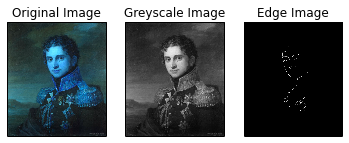

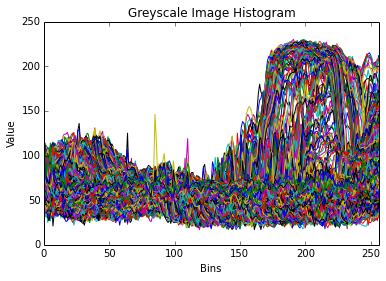

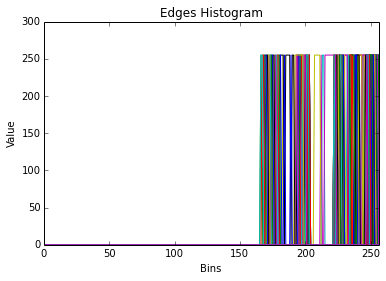

In [13]:
#EDGES
# http://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html#gsc.tab=0

import cv2
import numpy as np
from matplotlib import pyplot as plt


imgO = cv2.imread('Lab3.1/12.jpg')
img = cv2.imread('Lab3.1/12.jpg',0)
smoothedInput = cv2.GaussianBlur(img, (7,7), 2)
edges = cv2.Canny(smoothedInput,100,200)

plt.subplot(131),plt.imshow(imgO)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img,cmap = 'gray')
plt.title('Greyscale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

#print edges

plt.figure()
plt.title("Greyscale Image Histogram")
plt.xlabel("Bins")
plt.ylabel("Value")
plt.plot(img)
plt.xlim([0, 256])
plt.show()

plt.figure()
plt.title("Edges Histogram")
plt.xlabel("Bins")
plt.ylabel("Value")
plt.plot(edges)
plt.xlim([0, 256])
plt.show()

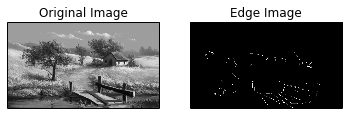

hist11: [ 524536.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       

In [6]:
# EDGE COMPARISON
# http://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html#gsc.tab=0

import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy.spatial import distance as dist

#print full output
#np.set_printoptions(threshold=np.nan)


class HSVHistogram:
    def __init__(self, bins):
        # store the number of bins the histogram will use
        self.bins = bins
    def convert(self, image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#    cvtColor(img, gray, CV_BGR2GRAY);
    def describe(self, image):        
        hsv = self.convert(image)
        hist = cv2.calcHist([hsv], [0, 1, 2], None, [180, 256, 100], [0, 180, 0, 256, 0, 100])
        return hist.flatten()
    

    def describeSatuation(self, image):
        #hsv = self.convert(image)
#        hist = cv2.calcHist([hsv], [1], None, [256], [0, 256])
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        return hist.flatten()
    
class EdgeComparator:
    def __init__(self, index):
        # store our index of images
        self.index = index
    def compare(self, queryFeatures):
        # initialize our dictionary of results
        results = {}
        
        # loop over the index
        for (k, features) in self.index.items():
            #print ('##')
            #print features
            #print queryFeatures
            #d = cv2.compareHist(features, queryFeatures, cv2.cv.CV_COMP_CHISQR)
            #d = dist.euclidean(features, queryFeatures)
            d = 0
 
            results[k] = d

        results = sorted([(v, k) for (k, v) in results.items()])
        return results
    

#read images in greyscale (0)
img11 = cv2.imread('Lab3.1/11.jpg', 0)
img12 = cv2.imread('Lab3.1/12.jpg', 0)
#smoothen images
smoothedInput11 = cv2.GaussianBlur(img11, (7,7), 2)
smoothedInput12 = cv2.GaussianBlur(img12, (7,7), 2)
#get edges
edges11 = cv2.Canny(smoothedInput11,100,200)
edges12 = cv2.Canny(smoothedInput12,100,200)

contours12, hierarchy12 = cv2.findContours(edges12, mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_SIMPLE)
#print ('contours12:')
#print contours12

plt.subplot(121),plt.imshow(img11,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges11,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(123),plt.imshow(contours12,cmap = 'gray')
#plt.title('Contours Image'), plt.xticks([]), plt.yticks([])
plt.show()
#print ('EDGES') 
#print ('edges11: ')
#print edges11
#print ('edges12: ')
#print edges12
# outout: array with 0 or 255 as values

#plt.figure()
#plt.title("Grayscale Histogram")
#plt.xlabel("Bins")
#plt.ylabel("# of Pixels")
#plt.plot(edges11)
#plt.xlim([0, 256])
#plt.show()

hsvHist = HSVHistogram([8,8,8])
hist11 = hsvHist.describeSatuation(edges11)
hist12 = hsvHist.describeSatuation(edges12)
print ('hist11: {}'.format(hist11))
print ('hist12: {}'.format(hist12))

index = {}
index[0] = edges11
index[1] = edges12
edgeComparator = EdgeComparator(index)

#print index

for (query, queryFeatures) in index.items():
    #print query
    #print queryFeatures
    results = edgeComparator.compare(queryFeatures)
    print results

In [9]:
# CROP IMAGE

import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('Lab3.1/10.jpg')


height, width, channels = img.shape

# get image areas
# top
img_top_left = img[0:height/3, 0:width/3]
img_top_middle = img[0:height/3, width/3:width-width/3]
img_top_right = img[0:height/3, width-width/3:width]
# middle
img_middle_left = img[height/3:height-height/3, 0:width/3]
img_center = img[height/3:height-height/3, width/3:width-width/3]
img_middle_right = img[height/3:height-height/3, width-width/3:width]
# bottom
img_bottom_left = img[height-height/3:height, 0:width/3]
img_bottom_middle = img[height-height/3:height, width/3:width-width/3]
img_bottom_right = img[height-height/3:height, width-width/3:width]


plt.subplot(111),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()


plt.subplot(331),plt.imshow(cv2.cvtColor(img_top_left, cv2.COLOR_BGR2RGB))
plt.title('Top Left'), plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(cv2.cvtColor(img_top_middle, cv2.COLOR_BGR2RGB))
plt.title('Top Middle'), plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(cv2.cvtColor(img_top_right, cv2.COLOR_BGR2RGB))
plt.title('Top Right'), plt.xticks([]), plt.yticks([])

plt.subplot(334),plt.imshow(cv2.cvtColor(img_middle_left, cv2.COLOR_BGR2RGB))
plt.title('Middle Left'), plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(cv2.cvtColor(img_center, cv2.COLOR_BGR2RGB))
plt.title('Center'), plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(cv2.cvtColor(img_middle_right, cv2.COLOR_BGR2RGB))
plt.title('Middle Right'), plt.xticks([]), plt.yticks([])

plt.subplot(337),plt.imshow(cv2.cvtColor(img_bottom_left, cv2.COLOR_BGR2RGB))
plt.title('Bottom Left'), plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(cv2.cvtColor(img_bottom_middle, cv2.COLOR_BGR2RGB))
plt.title(' Bottom Middle'), plt.xticks([]), plt.yticks([])
plt.subplot(339),plt.imshow(cv2.cvtColor(img_bottom_right, cv2.COLOR_BGR2RGB))
plt.title('Bottom Right'), plt.xticks([]), plt.yticks([])

plt.show()